# Imports and settings


In [1]:
import cryptocompare as cryptos
import pandas as pd
import numpy as np
from itertools import product
from scipy.stats import t
import pickle
import os
from dotenv import load_dotenv

%matplotlib inline

load_dotenv()
result = cryptos.cryptocompare._set_api_key_parameter(os.getenv('API_KEY'))  # set your own API key in a .env file

# Get data

In [2]:
symbol = 'BTC'  # set symbol here
reload = False  # set to True for new API call, otherwise load saved data
if reload:
    raw = cryptos.get_historical_price_day(symbol, currency='EUR', limit=2000)
    with open('raw', 'wb') as handle:
        pickle.dump(raw, handle)
else:
    with open('raw', 'rb') as handle:
        raw = pickle.load(handle)

In [3]:
data = pd.DataFrame(raw)
data['time'] = pd.to_datetime(data['time'], unit='s')
data.index = pd.DatetimeIndex(data['time'])
data = data[['close']]
data.columns = [symbol]
data.tail()

,BTC
time,
2022-11-11,16486.68
2022-11-12,16262.21
2022-11-13,15805.96
2022-11-14,16085.94
2022-11-15,16086.74


# Simple moving average trading strategy

In [4]:
days_short_term_window = 40
days_long_term_window = 160

data['SMA_SHORT_TERM'] = data[symbol].rolling(days_short_term_window).mean()
data['SMA_LONG_TERM'] = data[symbol].rolling(days_long_term_window).mean()

data.tail(n=30)

,BTC,SMA_SHORT_TERM,SMA_LONG_TERM
time,,,
2022-10-17,19865.60,19972.94600,22238.983813
2022-10-18,19606.10,19980.47650,22189.332250
2022-10-19,19587.23,19940.07750,22137.535313
2022-10-20,19479.37,19888.56375,22083.527438
2022-10-21,19441.38,19832.57075,22024.379812
2022-10-22,19480.55,19766.83275,21958.014875
2022-10-23,19838.43,19757.15675,21903.297937
2022-10-24,19557.63,19739.40475,21845.224187
2022-10-25,20156.82,19749.92225,21799.993125


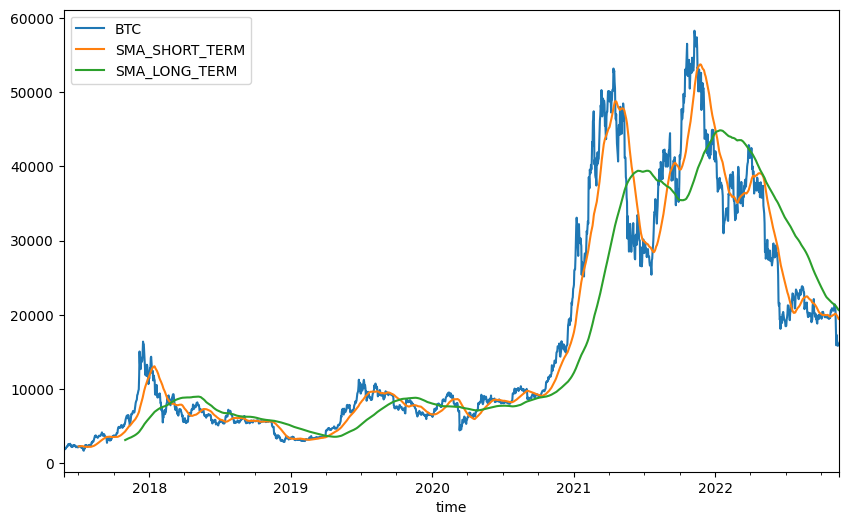

In [5]:
data.plot(figsize=(10, 6));

In [6]:
data.dropna(inplace=True)
data['position'] = np.where(data['SMA_SHORT_TERM'] > data['SMA_LONG_TERM'], 1, -1)

In [7]:
data.tail(n=30)

,BTC,SMA_SHORT_TERM,SMA_LONG_TERM,position
time,,,,
2022-10-17,19865.60,19972.94600,22238.983813,-1
2022-10-18,19606.10,19980.47650,22189.332250,-1
2022-10-19,19587.23,19940.07750,22137.535313,-1
2022-10-20,19479.37,19888.56375,22083.527438,-1
2022-10-21,19441.38,19832.57075,22024.379812,-1
2022-10-22,19480.55,19766.83275,21958.014875,-1
2022-10-23,19838.43,19757.15675,21903.297937,-1
2022-10-24,19557.63,19739.40475,21845.224187,-1
2022-10-25,20156.82,19749.92225,21799.993125,-1


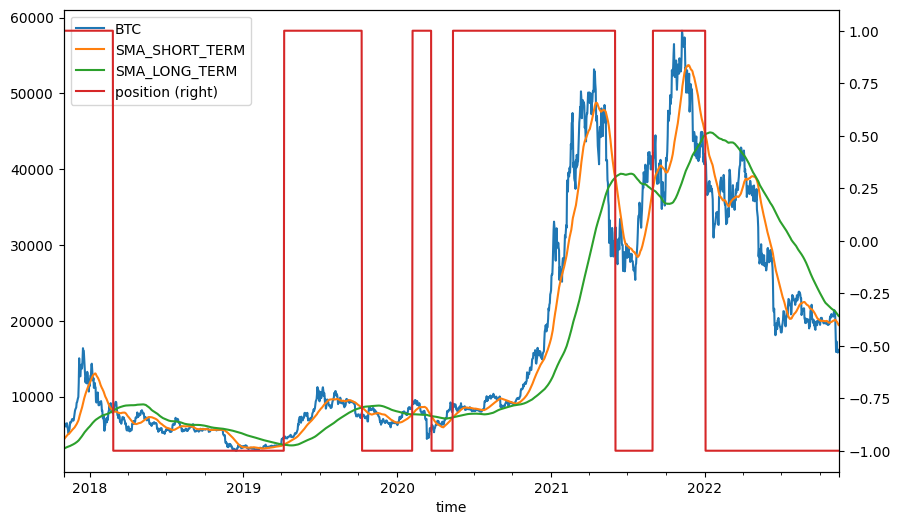

In [8]:
ax = data.plot(secondary_y='position', figsize=(10, 6))
ax.get_legend();

# Backtesting

In [9]:
data['buy_hold'] = np.log(data[symbol] / data[symbol].shift(1))
data['strategy'] = data['position'].shift(1) * data['buy_hold']
data.dropna(inplace=True)

In [10]:
data[['position', 'buy_hold', 'strategy']].tail()  # daily returns

,position,buy_hold,strategy
time,,,
2022-11-11,-1,-0.046577,0.046577
2022-11-12,-1,-0.013709,0.013709
2022-11-13,-1,-0.028457,0.028457
2022-11-14,-1,0.017559,-0.017559
2022-11-15,-1,0.000050,-0.000050


In [11]:
data[['buy_hold', 'strategy']].mean() * 365  # annualized return

buy_hold    0.211334
strategy    0.532407
dtype: float64

In [12]:
data[['buy_hold', 'strategy']].std() * 365 ** 0.5  # annualized volatility

buy_hold    0.783172
strategy    0.782754
dtype: float64

In [13]:
sharpe_ratio = (data[['buy_hold', 'strategy']].mean() * 365) / (data[['buy_hold', 'strategy']].std() * 365 ** 0.5)  # annualized Sharpe ratio
sharpe_ratio

buy_hold    0.269843
strategy    0.680172
dtype: float64

In [14]:
t_statistic = (data[['buy_hold', 'strategy']].mean() / data[['buy_hold', 'strategy']].std()) * len(data) ** 0.5
t_statistic

buy_hold    0.606027
strategy    1.527563
dtype: float64

In [15]:
p_s = pd.Series(t.sf(t_statistic, len(data) - 1) * 2)  # H0: sharpe_ratio == 0; two-sided test
p_s.index = t_statistic.index
p_s

buy_hold    0.544572
strategy    0.126793
dtype: float64

# Optimization

In [16]:
days_short_term_window = range(10, 95, 5)
days_long_term_window = range(100, 500, 5)

In [17]:
list(days_short_term_window)

[10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90]

In [18]:
list(days_long_term_window)

[100,
 105,
 110,
 115,
 120,
 125,
 130,
 135,
 140,
 145,
 150,
 155,
 160,
 165,
 170,
 175,
 180,
 185,
 190,
 195,
 200,
 205,
 210,
 215,
 220,
 225,
 230,
 235,
 240,
 245,
 250,
 255,
 260,
 265,
 270,
 275,
 280,
 285,
 290,
 295,
 300,
 305,
 310,
 315,
 320,
 325,
 330,
 335,
 340,
 345,
 350,
 355,
 360,
 365,
 370,
 375,
 380,
 385,
 390,
 395,
 400,
 405,
 410,
 415,
 420,
 425,
 430,
 435,
 440,
 445,
 450,
 455,
 460,
 465,
 470,
 475,
 480,
 485,
 490,
 495]

In [19]:
results_list = list()
for days_short, days_long in product(days_short_term_window, days_long_term_window):
    data = pd.DataFrame(raw)
    data['time'] = pd.to_datetime(data['time'], unit='s')
    data.index = pd.DatetimeIndex(data['time'])
    data = data[['close']]
    data.columns = [symbol]
    data.dropna(inplace=True)
    data['SMA_SHORT_TERM'] = data[symbol].rolling(days_short).mean()
    data['SMA_LONG_TERM'] = data[symbol].rolling(days_long).mean()
    data.dropna(inplace=True)
    data['position'] = np.where(data['SMA_SHORT_TERM'] > data['SMA_LONG_TERM'], 1, -1)
    data['buy_hold'] = np.log(data[symbol] / data[symbol].shift(1))
    data['strategy'] = data['position'].shift(1) * data['buy_hold']
    data.dropna(inplace=True)
    num_obs = len(data)
    sharpe_ratio = data[['buy_hold', 'strategy']].mean() / data[['buy_hold', 'strategy']].std()
    sharpe_ratio_annualized = sharpe_ratio * 365 ** 0.5
    t_statistic = sharpe_ratio[['buy_hold', 'strategy']] * num_obs ** 0.5
    p_s = pd.Series(t.sf(abs(t_statistic), num_obs - 1) * 2)
    p_s.index = t_statistic.index

    results_list.append([num_obs, days_short, days_long, sharpe_ratio_annualized['strategy'], t_statistic['strategy'], p_s['strategy']])

results = pd.DataFrame(results_list, columns=['NUM_OBS', 'SMA_SHORT_TERM', 'SMA_LONG_TERM', 'SHARPE_RATIO_ANNUALIZED', 'T-STATISTIC', 'P-VALUE'])
results.sort_values('SHARPE_RATIO_ANNUALIZED', ascending=False)

,NUM_OBS,SMA_SHORT_TERM,SMA_LONG_TERM,SHARPE_RATIO_ANNUALIZED,T-STATISTIC,P-VALUE
0,1901,10,100,0.912284,2.081971,0.037479
1285,1876,90,125,0.881054,1.997435,0.045922
1286,1871,90,130,0.869336,1.968239,0.049188
1349,1556,90,445,0.838269,1.730780,0.083689
1272,1541,85,460,0.814630,1.673846,0.094364
...,...,...,...,...,...,...
509,1756,40,245,-0.168413,-0.369395,0.711878
681,1696,50,305,-0.178091,-0.383891,0.701108
265,1776,25,225,-0.202638,-0.446988,0.654938
267,1766,25,235,-0.206142,-0.453436,0.650290


In [20]:
number_tests_conducted = len(days_short_term_window) * len(days_long_term_window)
number_tests_conducted

1360

In [21]:
index_max_sharpe_ratio = results['SHARPE_RATIO_ANNUALIZED'] == results['SHARPE_RATIO_ANNUALIZED'].max()
p_s = results['P-VALUE'].loc[index_max_sharpe_ratio].item()
p_s

0.037478674946799705

In [22]:
p_m = 1 - (1 - p_s) ** number_tests_conducted
p_m

1.0

# Haircut Sharpe ratio

In [23]:
num_obs = results['NUM_OBS'].loc[index_max_sharpe_ratio].item()
haircut_sharpe_ratio_annualized = t.isf(p_m/2, num_obs - 1) / (num_obs ** 0.5) * 365 ** 0.5
haircut_sharpe_ratio_annualized

-2.909036069395466e-17